Análisis del Facundo
==================

In [12]:
import spacy
import textacy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
file = open("Facundo",encoding="utf-8")
nlp = spacy.load('es')


In [14]:
#Vamos a remover el preludio y final del proyecto gutenberg
Facundo = ''
start = "*** START OF THIS PROJECT GUTENBERG EBOOK FACUNDO ***\n"
end = "*** END OF THIS PROJECT GUTENBERG EBOOK FACUNDO ***\n"
for line in iter(file.readline,start):
    pass
for line in iter(file.readline,end):
    Facundo += line
    
Facundo = textacy.preprocess.preprocess_text(Facundo, no_punct=True)
Facundo =  textacy.preprocess.remove_punct(Facundo, marks="\n")

In [4]:
file.close()
doc_facundo = textacy.doc.Doc(Facundo)

Aquí ya hemos generado el doc 

In [5]:
#Aqui estamos generando un diccionario con las palabras que aparecian en el doc.
term_facundo =  doc_facundo.to_bag_of_terms(as_strings=True,ngrams=1,filter_stop=True,filter_punct = True,filter_nums=True,
                                            min_freq=3)
del term_facundo['y']
del term_facundo['']
del term_facundo['a']
del term_facundo['e']
del term_facundo['o']
del term_facundo['u']
del term_facundo['La']
del term_facundo['El']
del term_facundo['En']
del term_facundo['Los']
del term_facundo['No']

In [6]:
#Ahora ordenamos los valores, para ello lo hacemos usando tuplas.
sorted_term = sorted(term_facundo.items(), key=lambda freq: freq[1],reverse=True)
def frecuencia(array):
    frec=[]
    for i in array:
        frec.append(i[1])
    return frec

def palabra(array):
    palabra = []
    for i in array:
        palabra.append(i[0])
    return palabra    


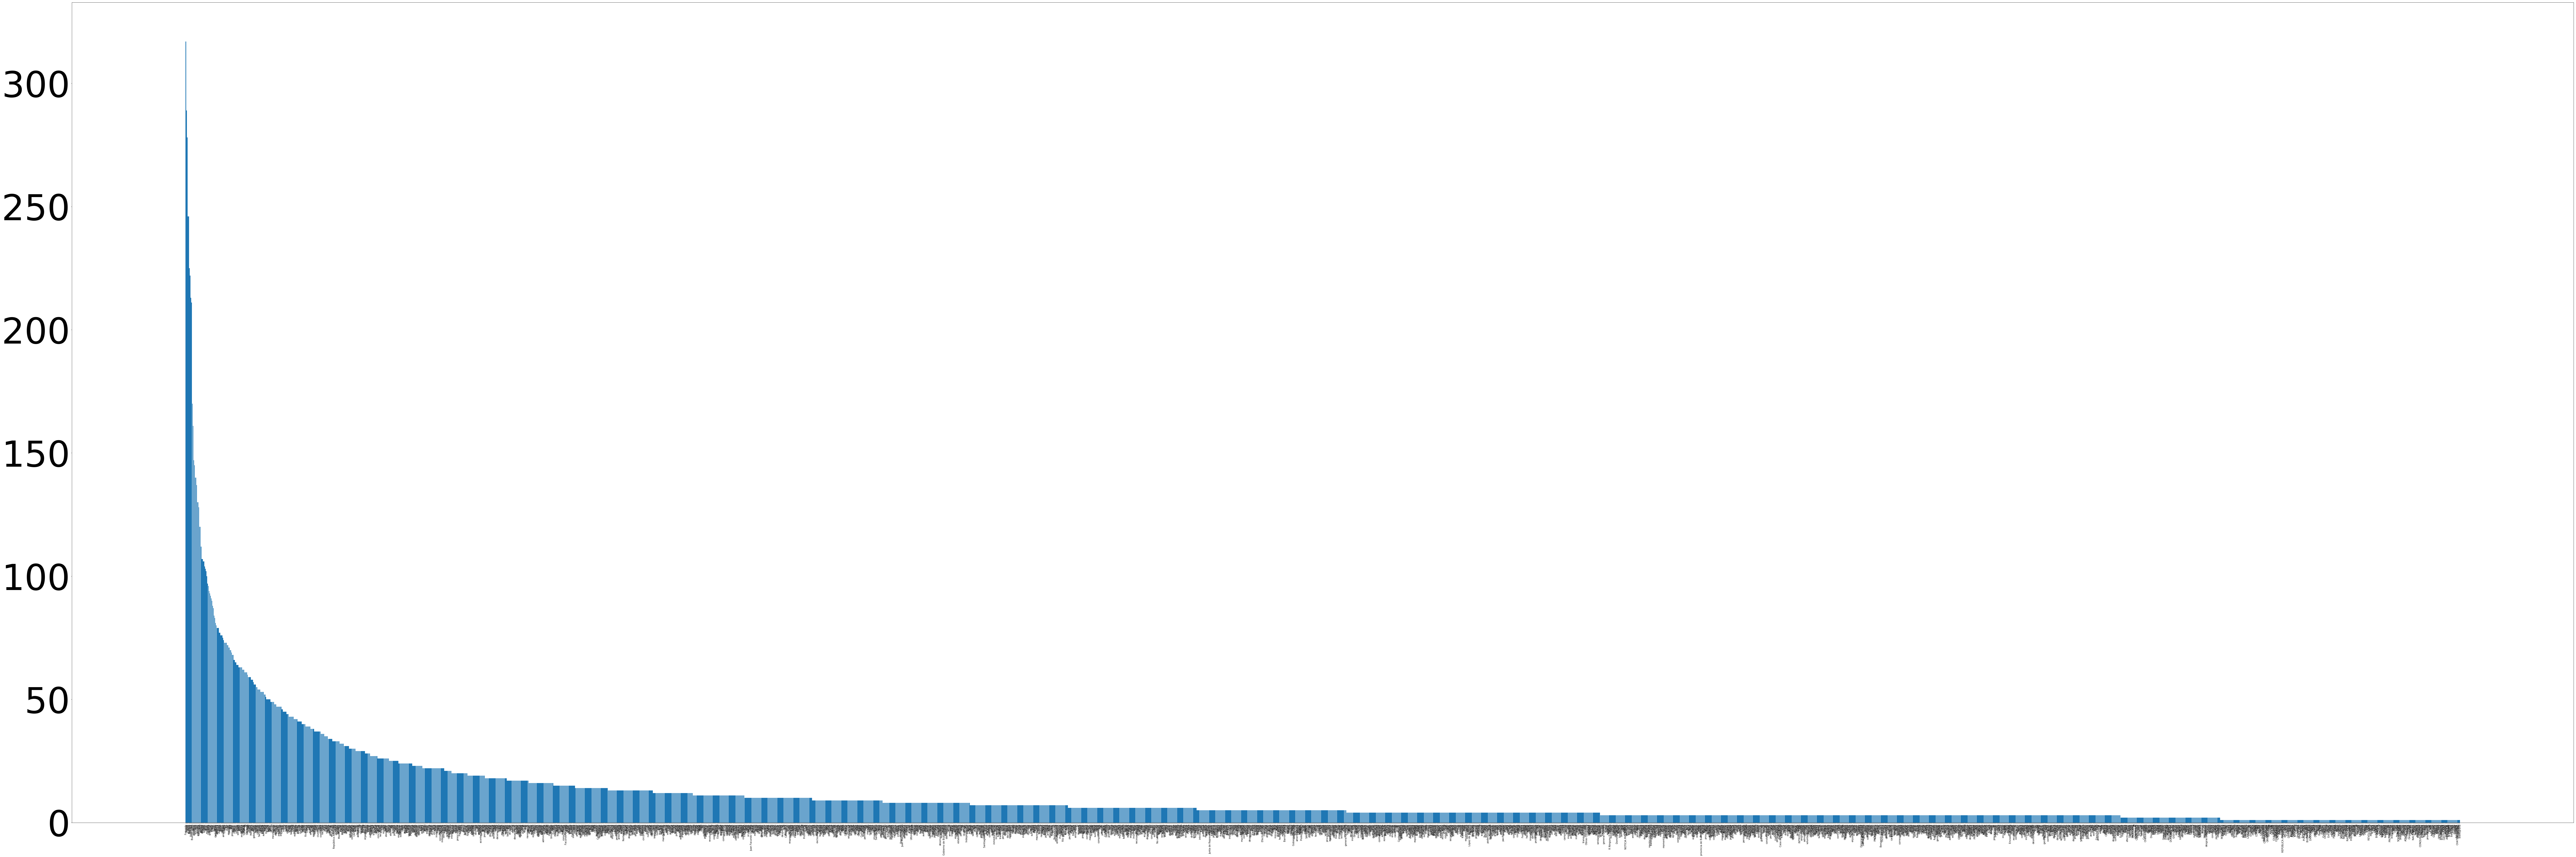

In [7]:
fig = plt.figure(figsize=(150,50))
plt.bar(range(len(sorted_term)),frecuencia(sorted_term),align='center',)
plt.xticks(range(len(term_facundo)),palabra(sorted_term),rotation='vertical')
plt.yticks(fontsize=150)
plt.tight_layout()
plt.show()

Por lo visto, el gráfico anterior solo sirve al objetivo de corroborar la regla del decaimiento en la frecuencia de las palabras, pero no permite visualizar para poder discriminar. Graficamos entonces la primera parte del gráfico para ver las primeras 100 palabras.

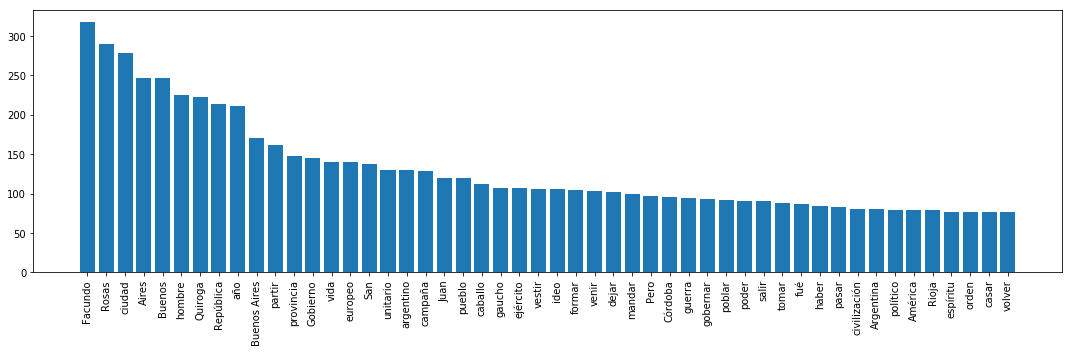

In [8]:
fig = plt.figure(figsize=(15,5))
plt.bar(range(len(sorted_term[:50])),frecuencia(sorted_term[:50]),align='center',)
plt.xticks(range(50),palabra(sorted_term[:50]),rotation='vertical')
plt.tight_layout()
plt.show()

Extraer entidades
=========

In [59]:
ent = textacy.extract.named_entities(doc_facundo, min_freq=10)
ent = pd.Series(list(ent)).astype(str).str.replace(","," ").unique()
ent = pd.DataFrame(ent,columns=['entidades'])
display(ent.head(10))

,entidades
0,SARMIENTO
1,Rosas
2,Chile
3,San Juan
4,Buenos Aires
5,Sarmiento
6,Facundo
7,América
8,FACUNDO
9,Aldao


## Otros análisis y visualizaciones

### World Cloud

In [1]:
from os import path
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [2]:
text = open('Facundo').read()
mapa_mask = np.array(Image.open('mapa-argentina.jpg'))

In [15]:
from spacy.lang.es.stop_words import STOP_WORDS

stopwords = set(STOP_WORDS)
stopwords.add("said")
stopwords.add('de')

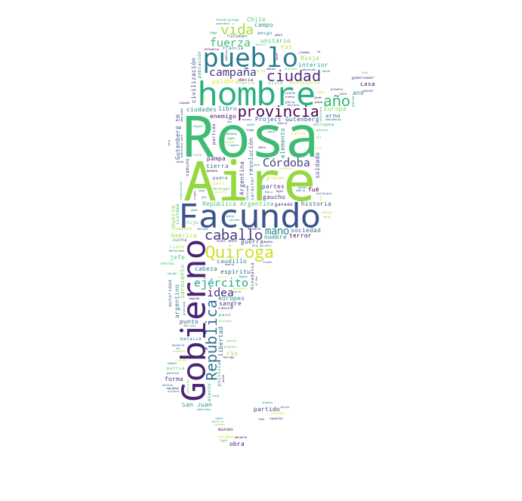

In [30]:
wc = WordCloud(background_color="white", max_words=2000, mask=mapa_mask,
               stopwords=stopwords)

# generate word cloud
wc.generate(text)

# store to file
wc.to_file('mapa-argentina.jpg')

# show
plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()